In [80]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

## Import

In [81]:
df = pd.read_excel("./input/PlacardProperties_19Aug0930.xlsx")

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     140 non-null    object
 1   CLASSDSCRP  140 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [83]:
df.head()

,Address,CLASSDSCRP
0,3321 1ST AVE SW,RESIDENTIAL
1,4619 F AVE NE,RESIDENTIAL
2,254 BRENTWOOD CIR NE,RESIDENTIAL
3,1600 WENIG CT NE,RESIDENTIAL
4,1624 WENIG RD NE,RESIDENTIAL


## Trim

In [84]:
columns = dict(
    Address="address",
    CLASSDSCRP="class"
)

In [85]:
trimmed = df.rename(columns=columns).sort_values("address")

In [86]:
trimmed.head()

,address,class
57,1006 CHEYENNE RD NW,RESIDENTIAL
98,1007 NORWOOD DR SE,RESIDENTIAL
97,1012 CHEYENNE RD NW,RESIDENTIAL
20,1013 CHEYENNE RD NW,RESIDENTIAL
73,1065 REGENT ST NE,RESIDENTIAL


In [87]:
trimmed['city'] = "Cedar Rapids"

In [88]:
trimmed['state'] = 'IA'

In [89]:
trimmed.to_csv("./output/placards.csv", index=False)

## Geocode

Records were geocoded at geocod.io

In [92]:
mapped = pd.read_csv("./input/geocoded.csv")

In [94]:
gdf = gpd.GeoDataFrame(
    mapped,
    geometry=gpd.points_from_xy(mapped.longitude, mapped.latitude)
)

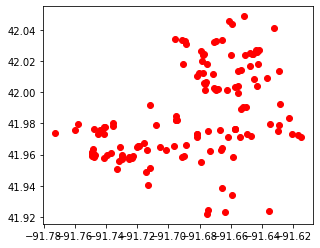

In [96]:
fig, ax = plt.subplots()
gdf.plot(ax=ax, color="red");

## Export

In [97]:
gdf.to_file("./output/placards.geojson", driver="GeoJSON")

In [99]:
gdf.to_csv("./output/placards.csv", index=False)